In [ ]:
import os
import torch
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.svm import SVC, LinearSVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm, datasets

In [ ]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
np.shape(X)

(150, 4)

# Applying t-SNE for dimensionality reduction

In [ ]:
tsne = TSNE(n_components=2, random_state=2021)
X_tsne = tsne.fit_transform(X)

In [ ]:
# Converting to DataFrame for easier manipulation
df = pd.DataFrame(data=X_tsne, columns=['Component 1', 'Component 2'])
df['Species'] = y

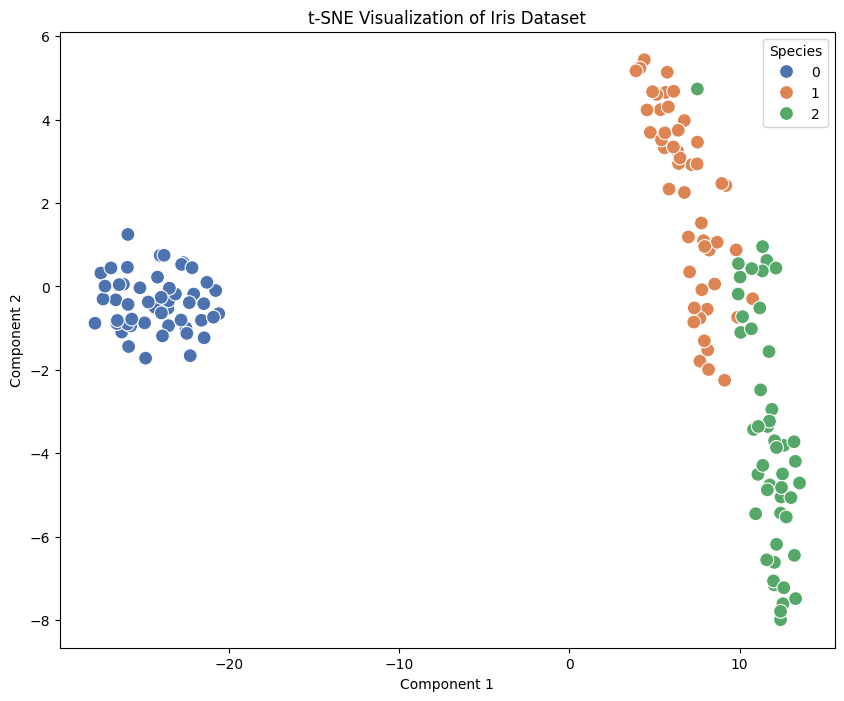

In [ ]:
# Plotting the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Component 1', y='Component 2', hue='Species', palette='deep', s=100)
plt.title('t-SNE Visualization of Iris Dataset')
plt.legend(title='Species', loc='upper right')
plt.savefig('t_sne_iris.png')
plt.show()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (105, 4)
y_train shape: (105,)
X_test shape: (45, 4)
y_test shape: (45,)


# Creating Linear SVM with LinearSVC and non_linear SVM with polynomial kernel

In [ ]:
model_linear = LinearSVC(C=0.1 ,random_state=2021, max_iter=5000, loss='squared_hinge')
model_linear2 = SVC(C=1 ,kernel='linear', probability=True)
model_non_linear = SVC(C=1 ,kernel='poly', probability=True)

# train the model

In [ ]:
model_linear.fit(X_train, y_train)
model_linear2.fit(X_train, y_train)
model_non_linear.fit(X_train, y_train)

SVC(C=1, kernel='poly', probability=True)

# Testing the models and using ROC-AUC metrics

In [ ]:
# make predictions from the model_linear and model_non_linear
Y_pred_linear = model_linear.predict(X_test)
Y_pred_nonlinear = model_non_linear.predict(X_test)

#confusion matrix
conf_matrix_linear = confusion_matrix(y_test, Y_pred_linear)
print("Confusion Matrix for Linear Model: \n", conf_matrix_linear)
print()

conf_matrix_nonlinear = confusion_matrix(y_test, Y_pred_nonlinear)
print("Confusion Matrix for non-Linear Model: \n", conf_matrix_nonlinear)
print()

#accuracy
accuracy_linear = model_linear.score(X_test, y_test)
print("Accuracy for Linear Model: %.2f \n" % accuracy_linear)

accuracy_nonlinear = model_non_linear.score(X_test, y_test)
print("Accuracy for non-Linear Model: %.2f \n" % accuracy_nonlinear)

#classification report
print("Classification Report For Linear Model: \n", classification_report(y_test, Y_pred_linear))
print("Classification Report For non-Linear Model: \n", classification_report(y_test, Y_pred_nonlinear))

#manual accuracy
# manual_acc = sum(conf_matrix[i][i] for i in range(len(conf_matrix))) / len(Y_pred)
# print("Manually Calculated Accuracy: %.2f " % manual_acc)

Confusion Matrix for Linear Model: 
 [[17  0  0]
 [ 0 14  2]
 [ 0  0 12]]

Confusion Matrix for non-Linear Model: 
 [[17  0  0]
 [ 0 14  2]
 [ 0  1 11]]

Accuracy for Linear Model: 0.96 

Accuracy for non-Linear Model: 0.93 

Classification Report For Linear Model: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.88      0.93        16
           2       0.86      1.00      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

Classification Report For non-Linear Model: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      0.88      0.90        16
           2       0.85      0.92      0.88        12

    accuracy                           0.93        45
   macro avg       0.93      0.93

In [ ]:
from sklearn.metrics import roc_auc_score


linear = roc_auc_score(y_test, model_non_linear.predict_proba(X_test), multi_class='ovr')
non_linear = roc_auc_score(y_test, model_linear2.predict_proba(X_test), multi_class='ovr')

print("ROC AUC for Linear Model :", linear)
print("ROC AUC for non-Linear Model:", non_linear)

ROC AUC for Linear Model : 0.9968797167073028
ROC AUC for non-Linear Model: 1.0
